In [1]:
from sklearn.datasets import load_diabetes

In [5]:
dataset=load_diabetes()
dataset

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990842, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06832974, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286377, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04687948,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452837, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00421986,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
print(dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [4]:
import pandas as pd
df_diabetes=pd.DataFrame(dataset.data,columns=['age',
                                               'sex',
                                               'bmi',
                                               'bp',
                                               's1',
                                               's2',
                                               's3',
                                               's4',
                                               's5',
                                               's6'
                                              ])

In [6]:
X=df_diabetes
y=dataset['target']

In [7]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [8]:
X_train.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
249,-0.012780,-0.044642,0.060618,0.052858,0.047965,0.029375,-0.017629,0.034309,0.070211,0.007207
389,-0.005515,0.050680,0.001339,-0.084857,-0.011201,-0.016658,0.048640,-0.039493,-0.041180,-0.088062
121,0.063504,-0.044642,0.017506,0.021872,0.008063,0.021546,-0.036038,0.034309,0.019908,0.011349
195,0.027178,0.050680,0.025051,0.014987,0.025950,0.048477,-0.039719,0.034309,0.007837,0.023775
69,0.016281,-0.044642,-0.046085,-0.005671,-0.075870,-0.061438,-0.013948,-0.039493,-0.051401,0.019633


In [10]:
X_train.corr()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
age,1.000000,0.197408,0.198359,0.394904,0.238375,0.192920,-0.128403,0.227110,0.314153,0.351570
sex,0.197408,1.000000,0.108261,0.221920,0.057674,0.180315,-0.379464,0.324882,0.150957,0.193322
bmi,0.198359,0.108261,1.000000,0.356327,0.226047,0.248146,-0.395021,0.412826,0.435507,0.358273
bp,0.394904,0.221920,0.356327,1.000000,0.238303,0.165642,-0.192504,0.249146,0.420236,0.368881
s1,0.238375,0.057674,0.226047,0.238303,1.000000,0.872781,0.006313,0.559626,0.566311,0.356280
s2,0.192920,0.180315,0.248146,0.165642,0.872781,1.000000,-0.265114,0.684840,0.325756,0.315890
s3,-0.128403,-0.379464,-0.395021,-0.192504,0.006313,-0.265114,1.000000,-0.754616,-0.370521,-0.297055
s4,0.227110,0.324882,0.412826,0.249146,0.559626,0.684840,-0.754616,1.000000,0.609980,0.436311
s5,0.314153,0.150957,0.435507,0.420236,0.566311,0.325756,-0.370521,0.609980,1.000000,0.490970
s6,0.351570,0.193322,0.358273,0.368881,0.356280,0.315890,-0.297055,0.436311,0.490970,1.000000


<AxesSubplot:>

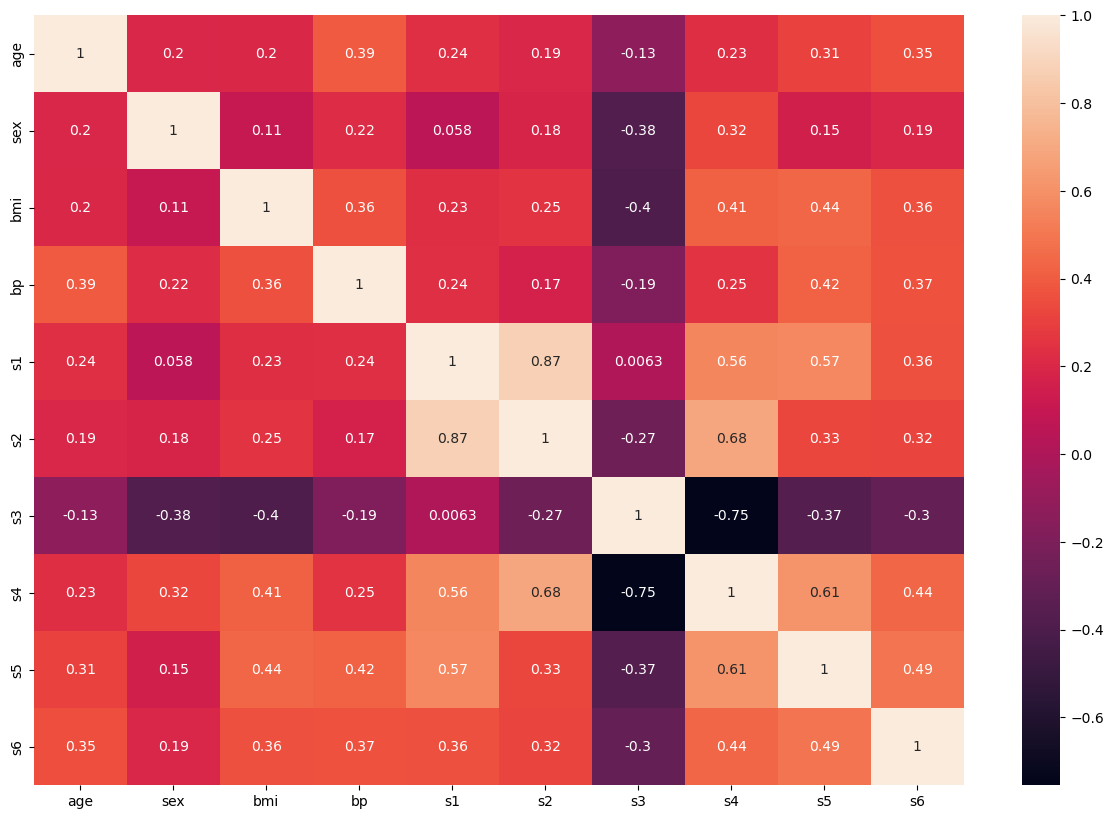

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
sns.heatmap(X_train.corr(),annot=True)

In [14]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor()
regressor.fit(X_train,y_train)

DecisionTreeRegressor()

## Hypermeter Tuning

In [20]:
param={
    'criterion':['squared_error','friedman_mse','absolute_error'],
    'splitter':['best','random'],
    'max_depth':[1, 2, 3, 4, 5, 10, 15, 20, 25],
    'max_features':['auto','sqrt','log2']
    
}

In [21]:
from sklearn.model_selection import GridSearchCV

In [22]:
regressor=DecisionTreeRegressor()

In [23]:
grid=GridSearchCV(regressor,param_grid=param,cv=5,scoring='neg_mean_squared_error')

In [24]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse',
                                       'absolute_error'],
                         'max_depth': [1, 2, 3, 4, 5, 10, 15, 20, 25],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error')

In [25]:
grid.best_params_

{'criterion': 'friedman_mse',
 'max_depth': 4,
 'max_features': 'log2',
 'splitter': 'best'}

In [26]:
y_pred=grid.predict(X_test)

In [27]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [29]:
print(r2_score(y_test, y_pred))
print(mean_absolute_error(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.32251318459443434
52.495889142360895
4286.913739106271


In [30]:
selectedmodel=DecisionTreeRegressor(criterion='friedman_mse',max_depth=4,max_features='log2',splitter='best')

In [31]:
selectedmodel.fit(X_train, y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=4,
                      max_features='log2')

[Text(0.5, 0.9, 'X[8] <= 0.022\nfriedman_mse = 5757.456\nsamples = 309\nvalue = 152.738'),
 Text(0.25, 0.7, 'X[8] <= -0.004\nfriedman_mse = 4016.257\nsamples = 205\nvalue = 123.444'),
 Text(0.125, 0.5, 'X[2] <= 0.006\nfriedman_mse = 2859.8\nsamples = 145\nvalue = 109.779'),
 Text(0.0625, 0.3, 'X[0] <= 0.022\nfriedman_mse = 2053.436\nsamples = 114\nvalue = 98.658'),
 Text(0.03125, 0.1, 'friedman_mse = 1782.246\nsamples = 89\nvalue = 91.438'),
 Text(0.09375, 0.1, 'friedman_mse = 2172.71\nsamples = 25\nvalue = 124.36'),
 Text(0.1875, 0.3, 'X[0] <= 0.064\nfriedman_mse = 3697.638\nsamples = 31\nvalue = 150.677'),
 Text(0.15625, 0.1, 'friedman_mse = 3577.489\nsamples = 29\nvalue = 155.552'),
 Text(0.21875, 0.1, 'friedman_mse = 100.0\nsamples = 2\nvalue = 80.0'),
 Text(0.375, 0.5, 'X[4] <= -0.013\nfriedman_mse = 5269.282\nsamples = 60\nvalue = 156.467'),
 Text(0.3125, 0.3, 'X[2] <= 0.086\nfriedman_mse = 6702.188\nsamples = 20\nvalue = 191.25'),
 Text(0.28125, 0.1, 'friedman_mse = 5024.645\nsa

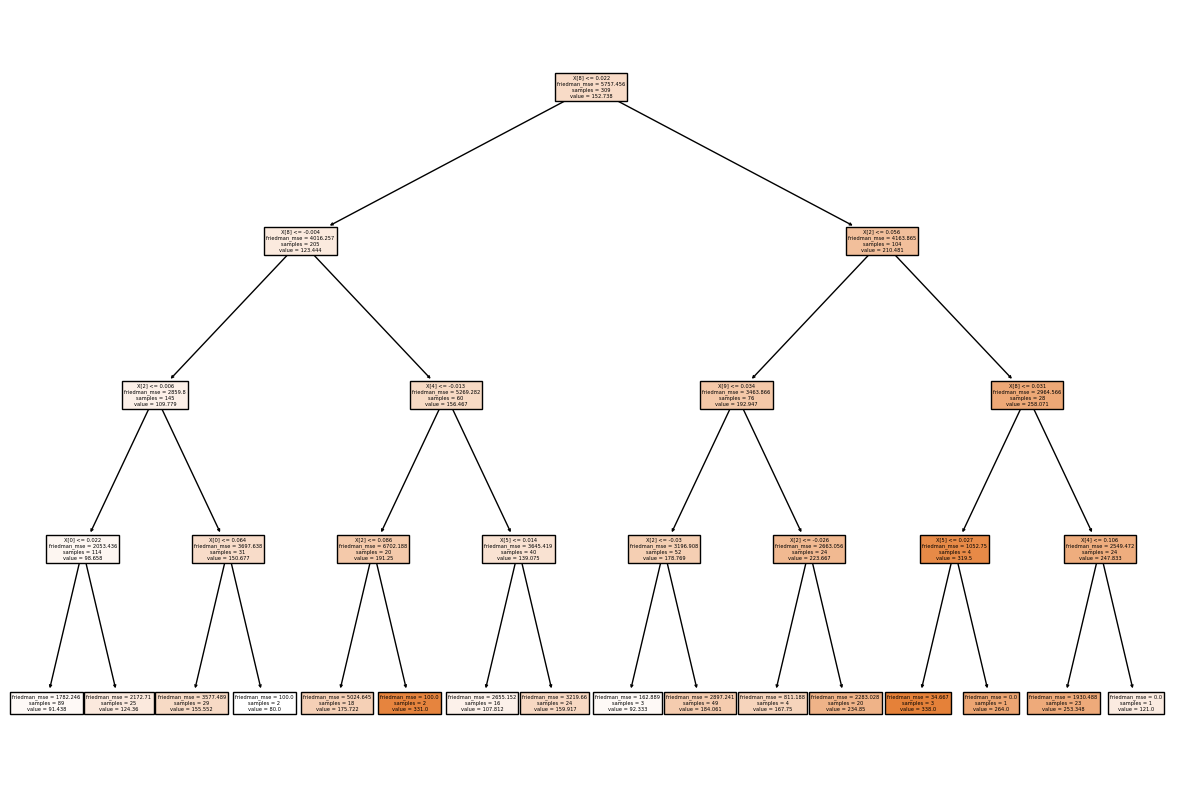

In [32]:
#Visualize the DT
import matplotlib.pyplot as plt
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(selectedmodel,filled=True)